# How to use Data Scaling Improve Deep Learning Model Stability and Performance
https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

# The Scale of Your Data Matters

# Scaling Input Variables

# Scaling Output Variables

# Data Scaling Methods

# Data Normalization

# Data Standardization

# Regression Predictive Modeling Problem

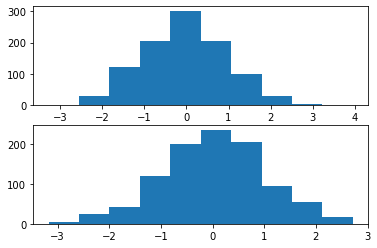

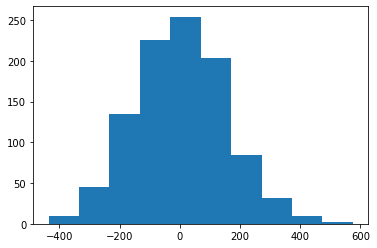

In [3]:
# regression predictive modeling problem
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# histograms of input variables
pyplot.subplot(211)
pyplot.hist(X[:, 0])
pyplot.subplot(212)
pyplot.hist(X[:, 1])
pyplot.show()
# histogram of target variable
pyplot.hist(y)
pyplot.show()

# Multilayer Perceptron With Unscaled Data

Train: nan, Test: nan


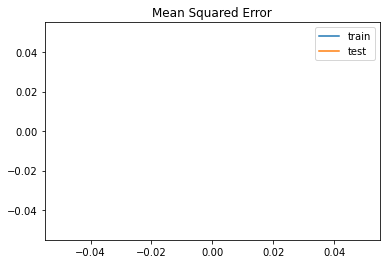

In [8]:

# mlp with unscaled data for the regression problem
from sklearn.datasets import make_regression
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9))
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [19]:
import pandas as pd
pd.DataFrame(trainX).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.583727,0.785936,-0.171872,0.669287,1.671810,0.598318,1.498076,0.279251,-0.317058,-0.419613,-0.217961,0.811867,-0.792153,0.566210,0.974736,-0.822374,1.030072,-0.679455,-0.215406,1.031189
1,1.836535,-0.439753,1.210371,1.495413,1.166660,-0.695817,-1.013652,-0.783010,0.740936,0.848620,1.293971,1.377905,1.141645,0.984230,-0.084615,-1.258028,1.138478,-0.619851,0.034862,0.252769
2,-0.116182,0.338823,-1.832381,0.849131,-1.001240,-0.207779,-1.016756,-0.095361,-0.735512,0.684862,-0.641591,-0.472694,-0.565611,0.533560,-1.063517,-0.367900,-1.398943,0.405313,-0.171244,0.633441
3,-0.108010,-0.404769,-0.107993,-1.146575,-0.692175,0.567931,0.423871,-0.762185,-1.216825,-0.168903,0.103165,-1.376652,-0.839116,0.739115,-0.584282,0.287434,1.451720,0.464322,1.279857,1.070726
4,-1.933846,0.785996,0.237308,-0.245901,0.878658,-2.166559,0.287565,1.147085,1.037847,0.104104,-1.117821,-0.915913,-0.988966,-0.552877,1.325872,2.537089,1.114503,-0.001376,-1.677632,-0.470153


# Multilayer Perceptron With Scaled Output Variables

Train: 0.004, Test: 0.011


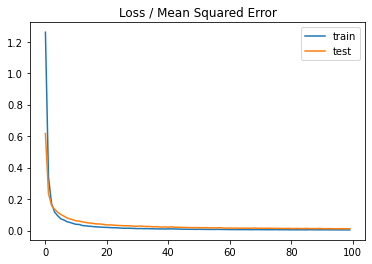

In [21]:

# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# reshape 1d arrays to 2d arrays
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)
# created scaler
scaler = StandardScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9))
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Multilayer Perceptron With Scaled Input Variables

>0.012
>0.011
>0.004
>0.011
>0.002
>0.004
>0.006
>0.007
>0.003
>0.009
>0.003
>0.006
>0.005
>0.012
>0.014
>0.015
>0.005
>0.012
>0.006
>0.006
>0.002
>0.010
>0.005
>0.008
>0.013
>0.011
>0.012
>0.009
>0.004
>0.011
>0.000
>0.000
>0.000
>0.000
>0.001
>0.001
>0.000
>0.000
>0.001
>0.001
>0.000
>0.000
>0.003
>0.000
>0.001
>0.001
>0.001
>0.000
>0.000
>0.000
>0.001
>0.000
>0.001
>0.000
>0.000
>0.000
>0.001
>0.001
>0.000
>0.000
>0.001
>0.003
>0.010
>0.005
>0.006
>0.013
>0.006
>0.008
>0.008
>0.005
>0.002
>0.002
>0.008
>0.010
>0.002
>0.006
>0.009
>0.007
>0.007
>0.000
>0.007
>0.014
>0.008
>0.002
>0.001
>0.000
>0.004
>0.008
>0.006
>0.010
Unscaled: 0.008 (0.004)
Normalized: 0.001 (0.001)
Standardized: 0.006 (0.004)


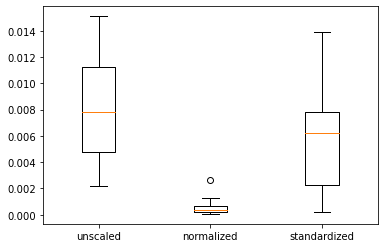

In [24]:

# compare scaling methods for mlp inputs on regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from numpy import mean
from numpy import std
 
# prepare dataset with input and output scalers, can be none
def get_dataset(input_scaler, output_scaler):
	# generate dataset
	X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	# scale inputs
	if input_scaler is not None:
		# fit scaler
		input_scaler.fit(trainX)
		# transform training dataset
		trainX = input_scaler.transform(trainX)
		# transform test dataset
		testX = input_scaler.transform(testX)
	if output_scaler is not None:
		# reshape 1d arrays to 2d arrays
		trainy = trainy.reshape(len(trainy), 1)
		testy = testy.reshape(len(trainy), 1)
		# fit scaler on training dataset
		output_scaler.fit(trainy)
		# transform training dataset
		trainy = output_scaler.transform(trainy)
		# transform test dataset
		testy = output_scaler.transform(testy)
	return trainX, trainy, testX, testy
 
# fit and evaluate mse of model on test set
def evaluate_model(trainX, trainy, testX, testy):
	# define model
	model = Sequential()
	model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='linear'))
	# compile model
	model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9))
	# fit model
	model.fit(trainX, trainy, epochs=100, verbose=0)
	# evaluate the model
	test_mse = model.evaluate(testX, testy, verbose=0)
	return test_mse
 
# evaluate model multiple times with given input and output scalers
def repeated_evaluation(input_scaler, output_scaler, n_repeats=30):
	# get dataset
	trainX, trainy, testX, testy = get_dataset(input_scaler, output_scaler)
	# repeated evaluation of model
	results = list()
	for _ in range(n_repeats):
		test_mse = evaluate_model(trainX, trainy, testX, testy)
		print('>%.3f' % test_mse)
		results.append(test_mse)
	return results
 
# unscaled inputs
results_unscaled_inputs = repeated_evaluation(None, StandardScaler())
# normalized inputs
results_normalized_inputs = repeated_evaluation(MinMaxScaler(), StandardScaler())
# standardized inputs
results_standardized_inputs = repeated_evaluation(StandardScaler(), StandardScaler())
# summarize results
print('Unscaled: %.3f (%.3f)' % (mean(results_unscaled_inputs), std(results_unscaled_inputs)))
print('Normalized: %.3f (%.3f)' % (mean(results_normalized_inputs), std(results_normalized_inputs)))
print('Standardized: %.3f (%.3f)' % (mean(results_standardized_inputs), std(results_standardized_inputs)))
# plot results
results = [results_unscaled_inputs, results_normalized_inputs, results_standardized_inputs]
labels = ['unscaled', 'normalized', 'standardized']
pyplot.boxplot(results, labels=labels)
pyplot.show()

# Extensions

# Normalize Target Variable. Update the example and normalize instead of standardize the target variable and compare results.


# Multilayer Perceptron With Scaled Output Variables

Train: 0.002, Test: 0.003


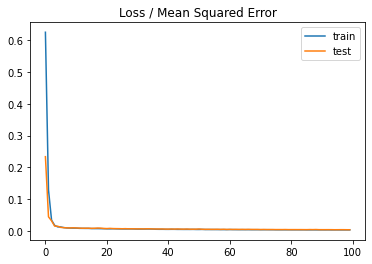

In [27]:

# mlp with scaled outputs on the regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
# generate regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# reshape 1d arrays to 2d arrays
trainy = trainy.reshape(len(trainy), 1)
testy = testy.reshape(len(trainy), 1)
# created scaler
scaler = MinMaxScaler()
# fit scaler on training dataset
scaler.fit(trainy)
# transform training dataset
trainy = scaler.transform(trainy)
# transform test dataset
testy = scaler.transform(testy)
# define model
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9))
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=100, verbose=0)
# evaluate the model
train_mse = model.evaluate(trainX, trainy, verbose=0)
test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# Compared Scaling for Target Variable. Update the example to compare standardizing and normalizing the target variable using repeated experiments and compare the results.


>0.008
>0.005
>0.006
>0.012
>0.001
>0.006
>0.003
>0.011
>0.006
>0.001
>0.011
>0.000
>0.012
>0.009
>0.005
>0.011
>0.008
>0.010
>0.008
>0.006
>0.007
>0.002
>0.010
>0.007
>0.007
>0.006
>0.008
>0.006
>0.012
>0.013
>0.004
>0.002
>0.003
>0.004
>0.003
>0.004
>0.003
>0.003
>0.004
>0.005
>0.003
>0.004
>0.004
>0.004
>0.004
>0.004
>0.004
>0.003
>0.003
>0.003
>0.003
>0.003
>0.004
>0.003
>0.004
>0.003
>0.004
>0.004
>0.003
>0.003
>0.000
>0.000
>0.001
>0.000
>0.000
>0.001
>0.001
>0.000
>0.001
>0.001
>0.000
>0.001
>0.000
>0.000
>0.000
>0.000
>0.002
>0.001
>0.001
>0.000
>0.001
>0.000
>0.000
>0.001
>0.001
>0.000
>0.000
>0.000
>0.001
>0.001
>0.000
>0.001
>0.000
>0.001
>0.000
>0.000
>0.000
>0.001
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.001
>0.000
>0.001
>0.000
>0.001
>0.002
>0.000
>0.001
>0.001
>0.000
>0.010
>0.001
>0.002
>0.000
>0.000
>0.002
>0.009
>0.005
>0.003
>0.004
>0.007
>0.010
>0.005
>0.010
>0.013
>0.004
>0.009
>0.005
>0.009
>0.011
>0.004
>0.007
>0.006
>0.006
>0.007
>0.011
>0.003
>0.001

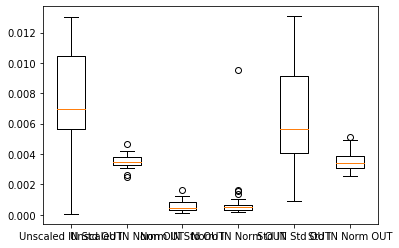

In [28]:

# compare scaling methods for mlp inputs on regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from numpy import mean
from numpy import std
 
# prepare dataset with input and output scalers, can be none
def get_dataset(input_scaler, output_scaler):
	# generate dataset
	X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	# scale inputs
	if input_scaler is not None:
		# fit scaler
		input_scaler.fit(trainX)
		# transform training dataset
		trainX = input_scaler.transform(trainX)
		# transform test dataset
		testX = input_scaler.transform(testX)
	if output_scaler is not None:
		# reshape 1d arrays to 2d arrays
		trainy = trainy.reshape(len(trainy), 1)
		testy = testy.reshape(len(trainy), 1)
		# fit scaler on training dataset
		output_scaler.fit(trainy)
		# transform training dataset
		trainy = output_scaler.transform(trainy)
		# transform test dataset
		testy = output_scaler.transform(testy)
	return trainX, trainy, testX, testy
 
# fit and evaluate mse of model on test set
def evaluate_model(trainX, trainy, testX, testy):
	# define model
	model = Sequential()
	model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='linear'))
	# compile model
	model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9))
	# fit model
	model.fit(trainX, trainy, epochs=100, verbose=0)
	# evaluate the model
	test_mse = model.evaluate(testX, testy, verbose=0)
	return test_mse
 
# evaluate model multiple times with given input and output scalers
def repeated_evaluation(input_scaler, output_scaler, n_repeats=30):
	# get dataset
	trainX, trainy, testX, testy = get_dataset(input_scaler, output_scaler)
	# repeated evaluation of model
	results = list()
	for _ in range(n_repeats):
		test_mse = evaluate_model(trainX, trainy, testX, testy)
		print('>%.3f' % test_mse)
		results.append(test_mse)
	return results
 
# unscaled inputs, standardized target
results_unscaled_inputs_standardized_output = repeated_evaluation(None, StandardScaler())
# unscaled inputs, normalized target
results_unscaled_inputs_normalized_output = repeated_evaluation(None, MinMaxScaler())
# normalized inputs, standardized target
results_normalized_inputs_standardized_output = repeated_evaluation(MinMaxScaler(), StandardScaler())
# normalized inputs, normalized target
results_normalized_inputs_normalized_output = repeated_evaluation(MinMaxScaler(), MinMaxScaler())
# standardized inputs, standardized target
results_standardized_inputs_standardized_output = repeated_evaluation(StandardScaler(), StandardScaler())
# standardized inputs, normalized target
results_standardized_inputs_normalized_output = repeated_evaluation(StandardScaler(), MinMaxScaler())
# summarize results
print('Unscaled_Inputs_Std_Output: %.3f (%.3f)' % (mean(results_unscaled_inputs_standardized_output), std(results_unscaled_inputs_standardized_output)))
print('Unscaled_inputs_Normalized_Output: %.3f (%.3f)' % (mean(results_unscaled_inputs_normalized_output), std(results_unscaled_inputs_normalized_output)))
print('Normalized_Inputs_Standardized_Output: %.3f (%.3f)' % (mean(results_normalized_inputs_standardized_output), std(results_normalized_inputs_standardized_output)))
print('Normalized_Inputs_Normalized_Output: %.3f (%.3f)' % (mean(results_normalized_inputs_normalized_output), std(results_normalized_inputs_normalized_output)))
print('Standardized_Inputs_Standardized_Output: %.3f (%.3f)' % (mean(results_standardized_inputs_standardized_output), std(results_standardized_inputs_standardized_output)))
print('Standardized_Inputs_Normalized_Output: %.3f (%.3f)' % (mean(results_standardized_inputs_normalized_output), std(results_standardized_inputs_normalized_output)))
# plot results
results = [results_unscaled_inputs_standardized_output, results_unscaled_inputs_normalized_output, results_normalized_inputs_standardized_output, results_normalized_inputs_normalized_output, results_standardized_inputs_standardized_output, results_standardized_inputs_normalized_output]
labels = ['Unscaled IN Std OUT', 'Unscaled IN Norm OUT', 'Norm IN Std OUT', 'Norm IN Norm OUT', 'Std IN Std OUT', 'Std IN Norm OUT',]
pyplot.boxplot(results, labels=labels)
pyplot.show()

# Other Scales. Update the example to evaluate other min/max scales when normalizing and compare performance, e.g. [-1, 1] and [0.0, 0.5].

>0.005
>0.002
>0.003
>0.006
>0.004
>0.004
>0.007
>0.004
>0.005
>0.004
>0.007
>0.005
>0.010
>0.007
>0.004
>0.007
>0.005
>0.005
>0.008
>0.010
>0.002
>0.004
>0.003
>0.008
>0.004
>0.004
>0.004
>0.002
>0.006
>0.002
>0.003
>0.003
>0.003
>0.004
>0.004
>0.003
>0.003
>0.005
>0.004
>0.003
>0.004
>0.004
>0.004
>0.004
>0.004
>0.003
>0.003
>0.003
>0.004
>0.003
>0.003
>0.001
>0.003
>0.003
>0.005
>0.005
>0.004
>0.003
>0.003
>0.004
>0.006
>0.006
>0.007
>0.005
>0.005
>0.007
>0.006
>0.006
>0.003
>0.007
>0.005
>0.006
>0.008
>0.007
>0.005
>0.005
>0.006
>0.006
>0.006
>0.005
>0.005
>0.005
>0.004
>0.006
>0.007
>0.004
>0.007
>0.004
>0.006
>0.007
Normalized_Inputs_Standardized_Output: 0.005 (0.002)
Normalized_Inputs_Normalized_Output: 0.004 (0.001)
Standardized_Inputs_Normalized_Output: 0.006 (0.001)


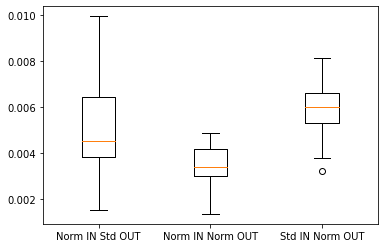

>0.001
>0.000
>0.001
>0.000
>0.000
>0.000
>0.001
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.000
>0.001
>0.000
>0.000
>0.000
>0.001
>0.001
>0.000
>0.000
>0.002
>0.001
>0.005
>0.000
>0.000
>0.000
>0.001
>0.003
>0.006
>0.001
>0.002
>0.002
>0.002
>0.001
>0.001
>0.002
>0.001
>0.001
>0.001
>0.001
>0.001
>0.001
>0.001
>0.002
>0.001
>0.001
>0.001
>0.001
>0.001
>0.001
>0.001
>0.002
>0.001
>0.002
>0.002
>0.003
>0.002
>0.001
>0.002
>0.001
>0.002
>0.002
>0.001
>0.002
>0.001
>0.002
>0.002
>0.002
>0.002
>0.001
>0.002
>0.002
>0.001
>0.002
>0.002
>0.002
>0.002
>0.001
>0.002
>0.002
Normalized_Inputs_Standardized_Output: 0.000 (0.000)
Normalized_Inputs_Normalized_Output: 0.001 (0.001)
Standardized_Inputs_Normalized_Output: 0.002 (0.000)


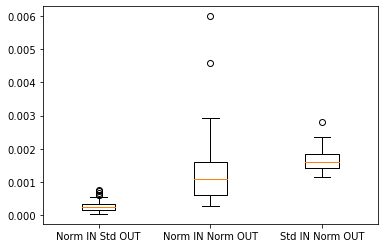

In [30]:

# compare scaling methods for mlp inputs on regression problem
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot
from numpy import mean
from numpy import std
 
# prepare dataset with input and output scalers, can be none
def get_dataset(input_scaler, output_scaler):
	# generate dataset
	X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=1)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	# scale inputs
	if input_scaler is not None:
		# fit scaler
		input_scaler.fit(trainX)
		# transform training dataset
		trainX = input_scaler.transform(trainX)
		# transform test dataset
		testX = input_scaler.transform(testX)
	if output_scaler is not None:
		# reshape 1d arrays to 2d arrays
		trainy = trainy.reshape(len(trainy), 1)
		testy = testy.reshape(len(trainy), 1)
		# fit scaler on training dataset
		output_scaler.fit(trainy)
		# transform training dataset
		trainy = output_scaler.transform(trainy)
		# transform test dataset
		testy = output_scaler.transform(testy)
	return trainX, trainy, testX, testy
 
# fit and evaluate mse of model on test set
def evaluate_model(trainX, trainy, testX, testy):
	# define model
	model = Sequential()
	model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='linear'))
	# compile model
	model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01, momentum=0.9))
	# fit model
	model.fit(trainX, trainy, epochs=100, verbose=0)
	# evaluate the model
	test_mse = model.evaluate(testX, testy, verbose=0)
	return test_mse
 
# evaluate model multiple times with given input and output scalers
def repeated_evaluation(input_scaler, output_scaler, n_repeats=30):
	# get dataset
	trainX, trainy, testX, testy = get_dataset(input_scaler, output_scaler)
	# repeated evaluation of model
	results = list()
	for _ in range(n_repeats):
		test_mse = evaluate_model(trainX, trainy, testX, testy)
		print('>%.3f' % test_mse)
		results.append(test_mse)
	return results
 

# normalized inputs (feature_range=(-1,1)), standardized target
results_normalized_inputs_standardized_output = repeated_evaluation(MinMaxScaler(feature_range=(-1,1)), StandardScaler())
# normalized inputs(feature_range=(-1,1)), normalized target(feature_range=(-1,1))
results_normalized_inputs_normalized_output = repeated_evaluation(MinMaxScaler(feature_range=(-1,1)), MinMaxScaler(feature_range=(-1,1)))
# standardized inputs, normalized target(feature_range=(-1,1))
results_standardized_inputs_normalized_output = repeated_evaluation(StandardScaler(), MinMaxScaler(feature_range=(-1,1)))
# summarize results
print('Normalized_Inputs_Standardized_Output: %.3f (%.3f)' % (mean(results_normalized_inputs_standardized_output), std(results_normalized_inputs_standardized_output)))
print('Normalized_Inputs_Normalized_Output: %.3f (%.3f)' % (mean(results_normalized_inputs_normalized_output), std(results_normalized_inputs_normalized_output)))
print('Standardized_Inputs_Normalized_Output: %.3f (%.3f)' % (mean(results_standardized_inputs_normalized_output), std(results_standardized_inputs_normalized_output)))
# plot results
results = [results_normalized_inputs_standardized_output, results_normalized_inputs_normalized_output, results_standardized_inputs_normalized_output]
labels = ['Norm IN Std OUT', 'Norm IN Norm OUT', 'Std IN Norm OUT',]
pyplot.boxplot(results, labels=labels)
pyplot.show()



# normalized inputs (feature_range=(0, 0.5)), standardized target
results_normalized_inputs_standardized_output = repeated_evaluation(MinMaxScaler(feature_range=(0, 0.5)), StandardScaler())
# normalized inputs(feature_range=(0, 0.5)), normalized target(feature_range=(0, 0.5))
results_normalized_inputs_normalized_output = repeated_evaluation(MinMaxScaler(feature_range=(0, 0.5)), MinMaxScaler(feature_range=(0, 0.5)))
# standardized inputs, normalized target(feature_range=(0, 0.5))
results_standardized_inputs_normalized_output = repeated_evaluation(StandardScaler(), MinMaxScaler(feature_range=(0, 0.5)))
# summarize results
print('Normalized_Inputs_Standardized_Output: %.3f (%.3f)' % (mean(results_normalized_inputs_standardized_output), std(results_normalized_inputs_standardized_output)))
print('Normalized_Inputs_Normalized_Output: %.3f (%.3f)' % (mean(results_normalized_inputs_normalized_output), std(results_normalized_inputs_normalized_output)))
print('Standardized_Inputs_Normalized_Output: %.3f (%.3f)' % (mean(results_standardized_inputs_normalized_output), std(results_standardized_inputs_normalized_output)))
# plot results
results = [results_normalized_inputs_standardized_output, results_normalized_inputs_normalized_output, results_standardized_inputs_normalized_output]
labels = ['Norm IN Std OUT', 'Norm IN Norm OUT', 'Std IN Norm OUT',]
pyplot.boxplot(results, labels=labels)
pyplot.show()

In [31]:
# Intersting; a model trained with normalized inputs (feature_range=(0, 0.5)) and standardized target lead to best model 
# that had nearly zero training and test loses. It appears to be a slightly better predictive model than a model trained with 
# normalized inputs(feature_range=(0, 1)) and standardized target.
